In [4]:
#####Install kaggle
!pip install kaggle

In [5]:
###API tokendeki yeni api oluştura basıp kaggle.json dosyasını kulllanıyorsun:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mveysikahraman","key":"07a56e3cd391e7f563090e9aba931a13"}'}

In [6]:
###Create a directory kaggle , move the kaggle.json to kaggle directory , change permissions to the file :
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
###datasetin copy api command kısmına basıyorsun
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 98% 771M/788M [00:03<00:00, 176MB/s]
100% 788M/788M [00:03<00:00, 210MB/s]


In [8]:
## zipden dosyası çıkarma
!unzip microsoft-catsvsdogs-dataset.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  i

In [11]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Veri seti dizini
data_dir = "/content/PetImages"
categories = ['Cat', 'Dog']
img_size = (64, 64)  # Resimleri yeniden boyutlandırmak için hedef boyutlar

# Verileri ve etiketleri saklamak için listeler
data = []
labels = []

# Resimleri yükleyin ve etiketleyin
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)  # 0 for Cat, 1 for Dog
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = load_img(img_path, target_size=img_size)  # Resmi yükleyin ve yeniden boyutlandırın
            img_array = img_to_array(img)  # Resmi numpy array'e çevirin
            data.append(img_array)
            labels.append(class_num)
        except Exception as e:
            pass  # Hatalı resimleri atla

# Verileri numpy array'e çevirin
data = np.array(data)
labels = np.array(labels)

# Verileri eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Sonuçları kontrol edin
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


X_train shape: (19998, 64, 64, 3)
y_train shape: (19998,)
X_test shape: (5000, 64, 64, 3)
y_test shape: (5000,)


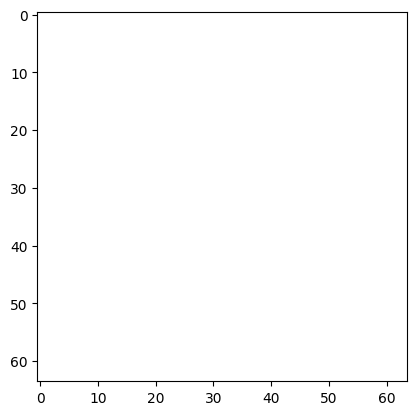

In [2]:
plt.figure()
plt.imshow(X_train[200])
plt.grid(False)
plt.show()

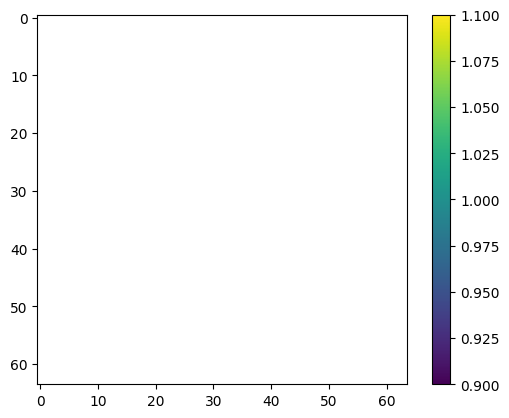

In [3]:
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
X_train = X_train / 255.0
y_train = y_train / 255.0

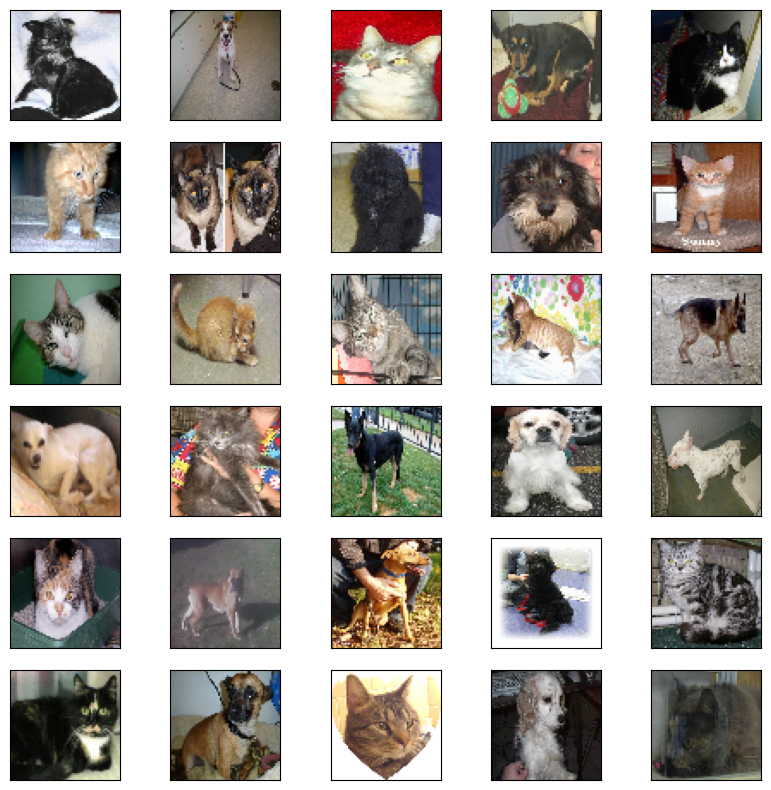

In [5]:
plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

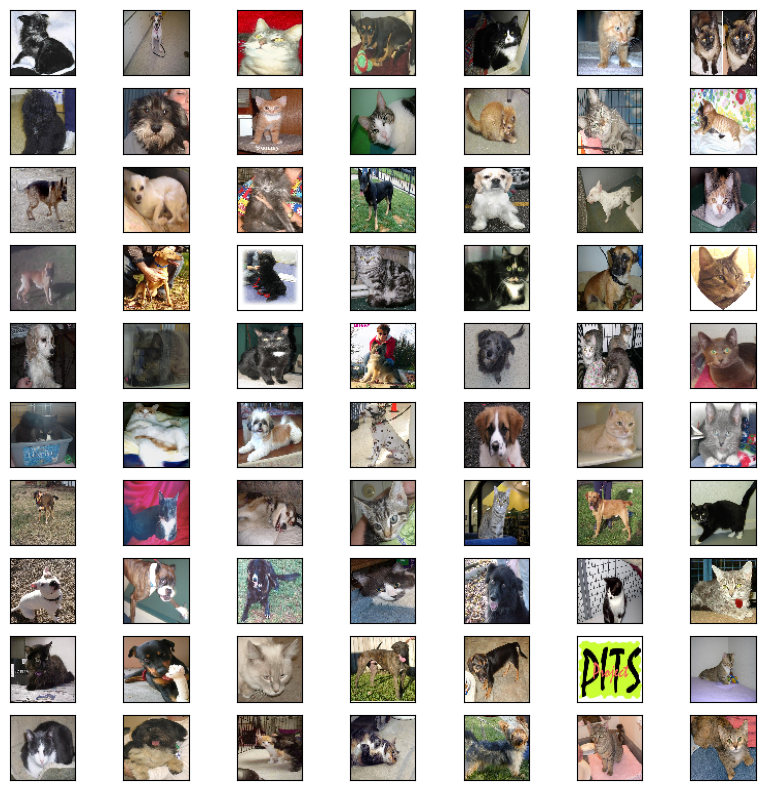

In [6]:
plt.figure(figsize=(10,10))

for i in range(70):
  plt.subplot(10,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [7]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
threshold1 = 0.5
threshold2 = 1.5

y_train = np.digitize(y_train, bins=[threshold1, threshold2])

In [9]:
y_train.shape

(19998,)

KNN İLE EĞİTİM

In [12]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [26]:
y_pred = knn.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [27]:
print(f'Doğruluk:{acc: .4f}')
print(f'F1:{f1: .4f}')
print(f'Yeniden çağırma:{recall: .4f}')
print(f'Kesinlik:{precision: .4f}')

Doğruluk: 0.5030
F1: 0.3367
Yeniden çağırma: 0.5030
Kesinlik: 0.2530


In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2515,    0],
       [2485,    0]])

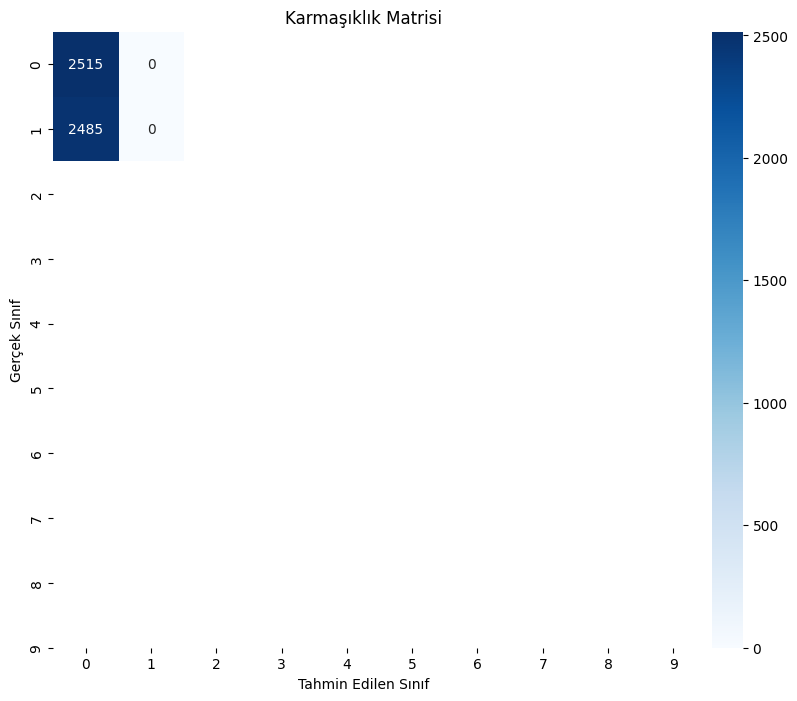

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [20]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [21]:
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")

In [22]:
print(f'Doğruluk:{acc: .4f}')
print(f'F1:{f1: .4f}')
print(f'Yeniden çağırma:{recall: .4f}')
print(f'Kesinlik:{precision: .4f}')

Doğruluk: 0.5030
F1: 0.3367
Yeniden çağırma: 0.5030
Kesinlik: 0.2530


In [23]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [24]:
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")
precision = precision_score(y_test, y_pred, average = "weighted")

In [25]:
print(f'Doğruluk:{acc: .4f}')
print(f'F1:{f1: .4f}')
print(f'Yeniden çağırma:{recall: .4f}')
print(f'Kesinlik:{precision: .4f}')

Doğruluk: 0.5030
F1: 0.3367
Yeniden çağırma: 0.5030
Kesinlik: 0.2530
